<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Feature Encoding

In the reading material you have seen how categorical features can be converted into numerical. In this notebook you will learn a bit more about feature encoding and its importance.

# Data

In this assignment we will analyse what sorts of people were likely to survive in the Titanic tragedy.
We are starting from importing some useful packages and loading Titanic dataset.

In [1]:
import pandas as pd
import numpy as np

df_titanic = pd.read_csv('/home/jovyan/Data/titanic.csv')

Let's take a closer look at the dataset. 

In [2]:
df_titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S


From the table above, we can note that there are several features we need to convert into numeric format, so that the machine learning algorithms can process them. 

Let's check the shape of the dataframe and if we have any missing values.

In [3]:
print('Shape of the dataframe ', df_titanic.shape)
df_titanic.isnull().sum()

Shape of the dataframe  (1309, 10)


pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

From above we see that there are 1309 datapoints. Note that here 9 out of 10 columns are features and one is the target variable (survived or not). We also see that there are some missing values, especially for cabin and age. 

Below you can find more detailed information about the columns of the dataframe.
- survival: Survival (0 = No, 1 = Yes) 
- pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) 
- sex: Sex	
- age: Age in years	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Let's check what is the percentage of missing values in the data.

In [4]:
total = df_titanic.isnull().sum().sort_values(ascending=False)
percent_1 = df_titanic.isnull().sum()/df_titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total missing', '% missing'])
missing_data

,Total missing,% missing
cabin,1014,77.5
age,263,20.1
embarked,2,0.2
fare,1,0.1
ticket,0,0.0
parch,0,0.0
sibsp,0,0.0
sex,0,0.0
survived,0,0.0
pclass,0,0.0


Let's analyse the above result. The feature "embarked" has only 2 missing values, which is just 0.2% of all data and can easily be filled. However, it will be much more tricky to deal with the age feature, which has 263 (20%) missing values. The cabin feature needs further investigation, but it looks like we might want to drop it from the dataset, since 77% of it are missing. For this assignment let's drop it, but go ahead and play around with it if you want to learn more. 

In [5]:
df_titanic.drop(['cabin'], axis=1,inplace=True)

# Data exploration

In the reading material you will find more on data exploration. However, since it is important to know your data, we have included some exploratory plots below. This is also for you to get a feeling for what is possible in Python. 

### Features 'age' and 'sex'

We want to check if there is any connection between gender, age and survivability. On the plots below, you can see that certain ages and sex has higher probability of survival. For example, men have a high probability of survival when they are between 18 and 30 years old. 

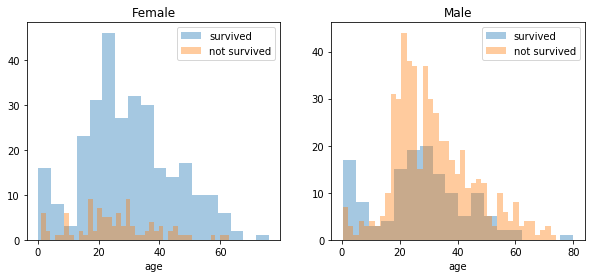

In [6]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

survived = 'survived'
not_survived = 'not survived'

women = df_titanic[df_titanic['sex']=='female']
men = df_titanic[df_titanic['sex']=='male']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Features 'embarked', 'pclass' and 'sex''

The plots below are divided into three different categories of embarked. The x-axis is pclass while the y-axis is the fraction of survived within that group. 

**Note**: Being female in either 1st or 2nd class increases your chances of survival quite a lot.

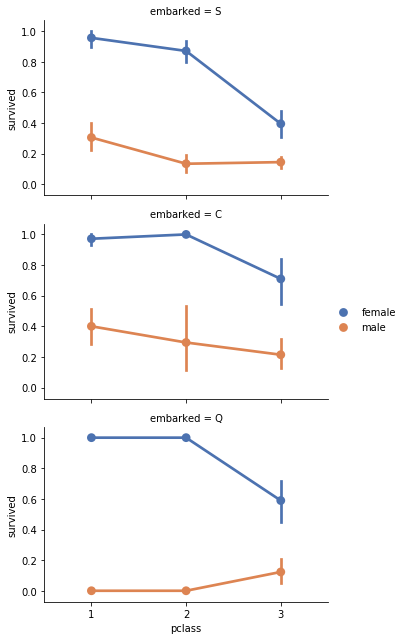

In [7]:
grid = sns.FacetGrid(df_titanic, row='embarked', aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep', order=[1,2,3], hue_order=["female","male"])
grid.add_legend()

plt.show()

Interesting enough, for embarked=Q, there seem to be a higher chance of survival if you are in 3rd class. Let's look into this further.

In [8]:
df_titanic[(df_titanic['embarked']=='Q') & (df_titanic['sex']=='male')].groupby(['pclass','survived']).count()['sex']

pclass  survived
1       0            1
2       0            5
3       0           50
        1            7
Name: sex, dtype: int64

Above we see that there was actually only 1 person in the 1st class and 5 in the 2nd class from embarked=Q, none of them survived. This compared with 57 in the 3rd class, 7 of them survived. This shows the dangers in only looking at one result. From above table we now understand why there seem to be a higher chance of survival if you are in the 3rd class coming from Queenstown. It's probably because there were so few of the other classes to make an accurate distribution estimate. 

### Feature 'pclass'

Let's see the distribution of the passengers by classes.

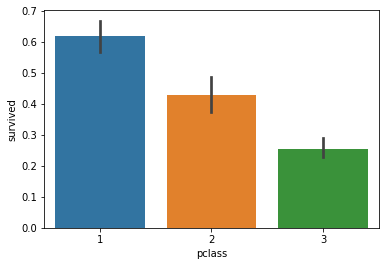

In [9]:
sns.barplot(x='pclass', y='survived', data=df_titanic)

We clearly see the survival rate depends on the pclass. 

There are many more plots to be made to understand the data. This is the key component in the data science workflow, especially since garbage in the data will result in garbage out of the model when it comes to machine learning models. 

Also, don't worry if you don't understand all the code. There are many online sources with great information about plotting. 

# Data preprocessing

Let's start with a reminder of our features.

In [10]:
df_titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.5500,S
2,1,0,female,2.0000,1,2,113781,151.5500,S
3,1,0,male,30.0000,1,2,113781,151.5500,S
4,1,0,female,25.0000,1,2,113781,151.5500,S


Above you can see that we have 3 categorical features: sex, ticket and embarked. Let's investigate and transform one after another.

### Missing values 

First let's deal with the missing values.

We will do a very simple imputation in the following notebook. However, for the interested reader, [here](https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca) and [here](https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-2-222154b4b58e) you can find a more comprehensive analysis on the missing values in the titanic data set. 

First we fill the missing values in 'age' feature with the median value of age depending on the gender. 

In [11]:
df_titanic['age'].fillna(df_titanic.groupby('sex')['age'].transform("median"), inplace=True)

The feature 'embarked' has two missing values. Let's fill these with the most frequent embarked category. 

In [12]:
embarked_most_frequent = df_titanic['embarked'].value_counts().idxmax()
df_titanic['embarked'].fillna(embarked_most_frequent, inplace=True)

Fill the missing values in 'fare' feature with each 'plcass'’s median value of 'fare'. 

In [13]:
df_titanic['fare'].fillna(df_titanic.groupby('pclass')['fare'].transform("median"), inplace=True)

Now we have no more missing values in data. 

In [14]:
df_titanic.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### Converting text categories to numerical

Recall from the reading material that there are useful packages for encoding categorical variables to numerical form. 

#### Let's start with the feature 'sex'.

### Q1:

Transform `sex` into numerical feature and add it to the data frame `df_titanic` under the name `sex_num`. While it is easy to do a transformation from two classes of string to two numbers by many methods, it is good to get practice at using `sklearn` methods that will be scalable to several classes, larger numbers of rows and features just as easily. 

**Hint:**
* import necessary package
* create a label encoder
* fit it with the feature `sex`
* create a new column in `df_titanic` called `sex_num` containing the numerical label of `sex`

In [15]:
# (approx. 4 lines of code)

### START ANSWER HERE ###
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_titanic['sex_num'] = le.fit_transform(df_titanic['sex'])
### END ANSWER HERE ###

In [16]:
df_titanic['sex_num'].values

array([0, 1, 0, ..., 1, 1, 1])

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> df_titanic['sex_num'].values</td> 
        <td> array([0, 1, 0, ..., 1, 1, 1])
 </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


Let's take a look at the dataframe with the new column.

In [17]:
df_titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,sex_num
0,1,1,female,29.0000,0,0,24160,211.3375,S,0
1,1,1,male,0.9167,1,2,113781,151.5500,S,1
2,1,0,female,2.0000,1,2,113781,151.5500,S,0
3,1,0,male,30.0000,1,2,113781,151.5500,S,1
4,1,0,female,25.0000,1,2,113781,151.5500,S,0


#### Let's look at the feature 'ticket''

Check first what kind if values this feature contains.

In [18]:
df_titanic['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [19]:
df_titanic['ticket'].value_counts().head(10)

CA. 2343        11
1601             8
CA 2144          8
3101295          7
347077           7
347082           7
S.O.C. 14879     7
PC 17608         7
113781           6
347088           6
Name: ticket, dtype: int64

From the above you can see that there are 929 unique tickets. When we look at the frequency of the different tickets we find that the most frequent appears just 11 times. Thus, it might not be worth encoding this feature and instead we will ignore it for now. If you are interested in a discussion of the importance of this feature, please take a look [here](https://www.kaggle.com/c/titanic/discussion/11127). 

In [20]:
df_titanic.drop(labels=['ticket'],axis=1, inplace=True)

#### Let's look at the feature 'embarked'

Let's get some information about this feature.

In [21]:
df_titanic['embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

### Q2:

Transform `embarked` into a numerical feature and add it to the dataframe `df_titanic` under the name 
`embarked_num`. 

**Hint:**
* create a new label encoder 
* fit it
* create a new column in `df_titanic` called `embarked_num` containing the numerical label of `embarked`

In [22]:
# (approx. 3 lines of code)

### START ANSWER HERE ###
le = LabelEncoder()
df_titanic['embarked_num'] = le.fit_transform(df_titanic['embarked'])
### END ANSWER HERE ###

In [23]:
df_titanic['embarked_num'].values

array([2, 2, 2, ..., 0, 0, 2])

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> df_titanic['embarked_num'].values</td> 
        <td> array([2, 2, 2, ..., 0, 0, 2])
 </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


### Q3:

How does the label encoder from Q2 encode the categories to numbers? Create the dictionary `dic_le_embarked` that shows the mapping between text and encoding. Use `dic_le_embarked = dict()` with the right input. 

In [24]:
# (approx. 1 line of the code)
### START ANSWER HERE ###
classes = le.classes_
encoded_classes = le.transform(le.classes_)

dic_le_embarked = dict(zip(classes, encoded_classes))
### END ANSWER HERE ###

In [25]:
dic_le_embarked

{'C': 0, 'Q': 1, 'S': 2}

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> dic_le_embarked</td> 
        <td> {'C': 0, 'Q': 1, 'S': 2}
 </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


### Q4:

If we were training a machine learning model using `embarked_num` as a feature, what do you believe to be the danger? 

1. We lose the fact that the letter Q is closer to S then to C in the alphabet, instead we make the distance equal. 
2. If using the encoding above, the algorithm will believe that S is closer to Q, when in reality C could be closer to S. 

In [26]:
# Fill in your answer in the form: Q4_answer = [5]
### START ANSWER HERE ###
Q4_answer = [2]
### END ANSWER HERE ###

In [27]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q4_answer)) == '9dfcb71dad3ced71f805b7bb4cd9dfc0':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


#### Let's implement one hot encoding

Instead of using `sklearn.preprocessing.OneHotEncoder` we will use pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). `get_dummies` is a little bit easier to use, [here](https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417) is a discussion about the two differences for the interested person. 

### Q5:

Use `get_dummies` to do the one hot encoding of the feature `embarked`. 

**Hint:**
* create the one hot encoding dataframe of the feature 'embarked' in the dummy variable below. Use `dummy = pd.get_dummies()` with the right input.

In [28]:
# (approx. 1 line of the code)

### START ANSWER HERE ###
dummy = pd.get_dummies(df_titanic['embarked'])
### END ANSWER HERE ###

# Concatenate the two dataframes
df_titanic = pd.concat([df_titanic,dummy],axis=1)

In [29]:
df_titanic.columns.values

array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'sex_num', 'embarked_num', 'C', 'Q', 'S'], dtype=object)

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> df_titanic.columns.values</td> 
        <td> array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'sex_num', 'embarked_num', 'C', 'Q', 'S'], dtype=object)
 </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


In [30]:
df_titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,sex_num,embarked_num,C,Q,S
0,1,1,female,29.0000,0,0,211.3375,S,0,2,0,0,1
1,1,1,male,0.9167,1,2,151.5500,S,1,2,0,0,1
2,1,0,female,2.0000,1,2,151.5500,S,0,2,0,0,1
3,1,0,male,30.0000,1,2,151.5500,S,1,2,0,0,1
4,1,0,female,25.0000,1,2,151.5500,S,0,2,0,0,1


You have now transformed the feature 'sex' into a numerical feature and done one hot encoding for the feature 'embarked'. Let's use these new features for a classifier. 

Note that we don't have to use the feature column 'S' since it is directly correlated with 'C' and 'Q' (one could also use `drop_first=True` when implementing `get_dummies()`).

In [31]:
features = ['pclass','age','sibsp','parch','fare','sex_num','C','Q'] 

X = df_titanic[features]
y = df_titanic['survived']

#### Let's try 4 different models for classification

It is not meant that you should know all these models or techniques below. The purpose is to introduce you to some new models/techniques you might not have come in contact with yet. Hopefully this will spark your curiosity to learn more on your own. 

Let's import some modules.

In [32]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [33]:
# Standard scaler
scaler =  StandardScaler()

# ML algorithms 
logistic_regression = LogisticRegression(solver='lbfgs')
support_vector_machine = SVC() 
random_forest = RandomForestClassifier(n_estimators=100)
adaboost = AdaBoostClassifier()

models = [('logistic regression',logistic_regression),
          ('support vector machine', support_vector_machine),
          ('random_forest',random_forest),
          ('adaboost', adaboost)]

In [34]:
# Temporarily suppress warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Let's look at the classifiers and their performance
for clf_name,clf in models:
    pipe = Pipeline([('transformer', scaler), ('estimator', clf)])
    scores = cross_val_score(pipe, X, y, cv = 5, scoring = "accuracy")
    print("Cross validation mean accuracy for {model} is cv = {mean:.4f}".format(model=clf_name,mean=np.mean(scores)))
    print("Cross validation accuracy variance for {model} is cv = {variance:.4f} \n".format(model=clf_name,variance=np.std(scores)**2))

Cross validation mean accuracy for logistic regression is cv = 0.7227
Cross validation accuracy variance for logistic regression is cv = 0.0123 

Cross validation mean accuracy for support vector machine is cv = 0.7020
Cross validation accuracy variance for support vector machine is cv = 0.0136 

Cross validation mean accuracy for random_forest is cv = 0.6501
Cross validation accuracy variance for random_forest is cv = 0.0066 

Cross validation mean accuracy for adaboost is cv = 0.6562
Cross validation accuracy variance for adaboost is cv = 0.0081 



We see above that there isn't much performance difference in the various ML models. Perhaps due to its simplicity we would go with logistic regression in this case. Also, having a more complex model does not necessarily improve the accuracy. This is an indication that perhaps looking at new features is more important than exploring other models at this point. Moreover, hyperparameter tuning could also help the models a bit, but we leave this for you to explore if interested. 

**Sidenote**: So what are we actually doing above? Well, we decided that we want to see if we can infer any performance difference in the 4 different models above. From the assignment about model selection, you learnt, that we can use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) for this. However, if we were scaling data before this step, then information in the test set will leak into the model. If you remember the last note in the reading material on Feature Scaling:

*Make sure that you fit the StandardScaler on the training-data and not on the whole dataset, and certainly not on the test-data.*

So instead of scaling before the `cross_val_score` we pass what is refered to as a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#examples-using-sklearn-pipeline-pipeline) which sequentially applies a list of transforms and a final estimator. This will help us to fit the scaler and classifier on only the training data and evaluate on the test one. 

The interested reader can find more ideas [here](https://www.kaggle.com/c/titanic/kernels?sortBy=voteCount&group=everyone&pageSize=20&competitionId=3136). 

## Good job! 